In [1]:
import pandas as pd

from plotnine import *
from plotnine.data import *

%matplotlib inline

In [2]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Basic scatter plot:

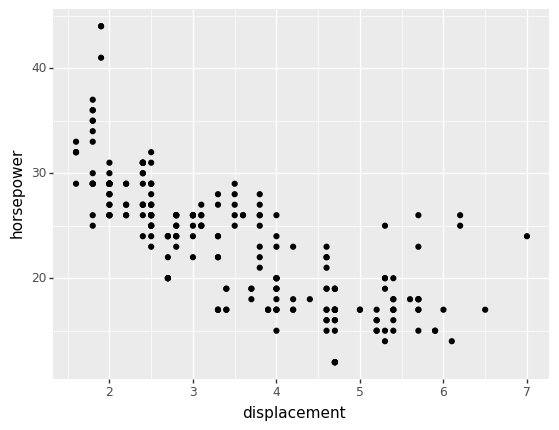

<ggplot: (7014762872)>

In [3]:
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + xlab('displacement')
    + ylab('horsepower')
)

Facet categorical data into rows:

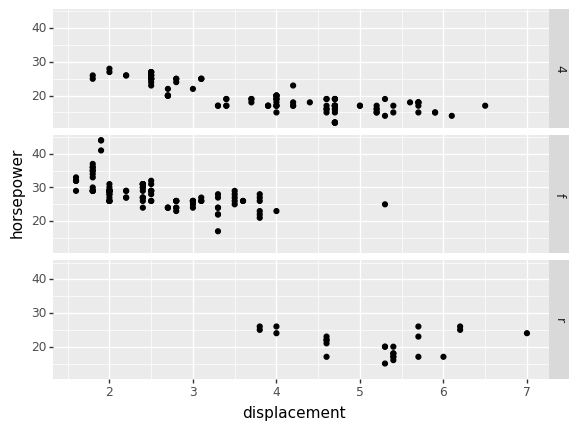

<ggplot: (7014762914)>

In [4]:
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv ~ .')
    + xlab('displacement')
    + ylab('horsepower')
)

Facet categorical data into columns:

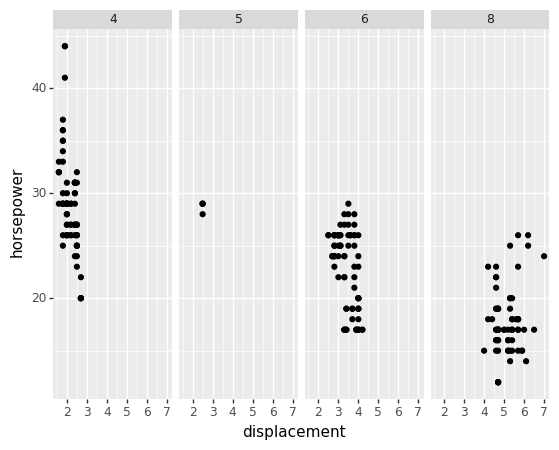

<ggplot: (-9223372029839344710)>

In [5]:
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('. ~ cyl')
    + xlab('displacement')
    + ylab('horsepower')
)

Facet two categorical data types into rows and columns:

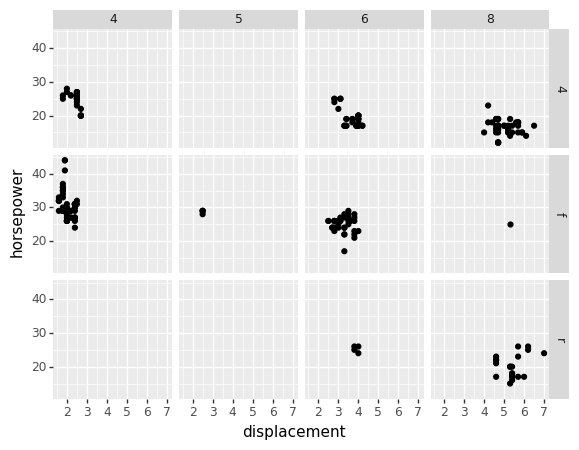

<ggplot: (-9223372029837304232)>

In [6]:
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv ~ cyl')
    + xlab('displacement')
    + ylab('horsepower')
)

To change plot order of the rows or columns in the facet grid, order of variable levels of the faceting variable.

In [7]:
# re-order categories
mpg['drv'] = mpg['drv'].cat.reorder_categories(['f', 'r','4'])

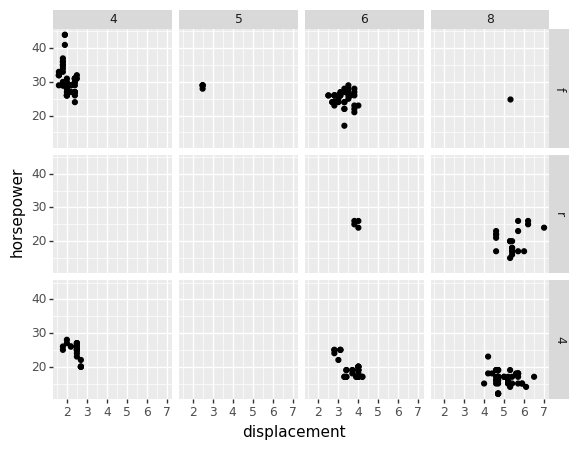

<ggplot: (-9223372029839266055)>

In [8]:
# facet plot with reorded drv category reordered
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv ~ cyl')
    + xlab('displacement')
    + ylab('horsepower')
)

You can choose if the scale of x- and y-axes are fixed or variable by using the `scales` argument within the `facet_grid()` command:

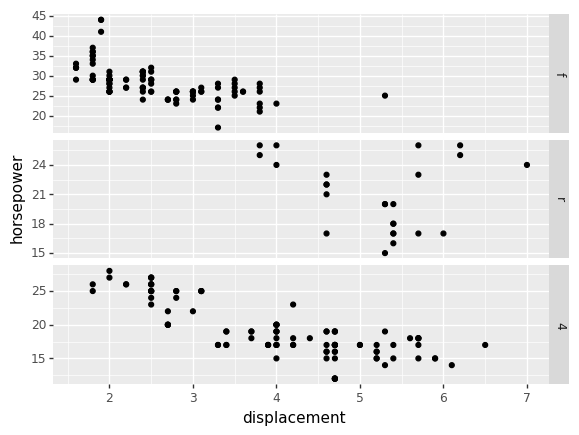

<ggplot: (7016142498)>

In [9]:
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv ~ .', scales = 'free')
    + xlab('displacement')
    + ylab('horsepower')
)

You can add additional information to your facet labels, by using the `labeller` argument within the `facet_grid()` command. Below we use `labeller = 'label_both'` to include the column name in the facet label.

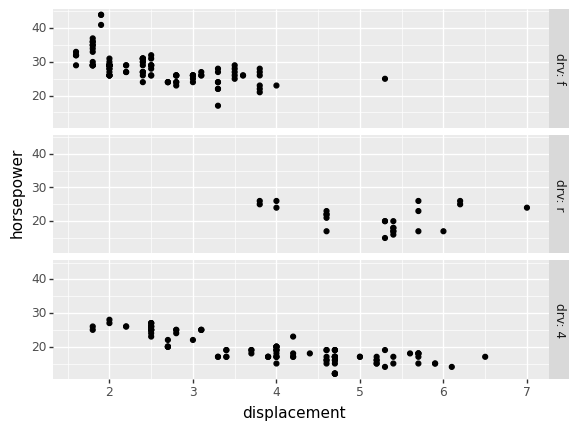

<ggplot: (7015205647)>

In [10]:
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv ~ .', labeller = 'label_both')
    + xlab('displacement')
    + ylab('horsepower')
)

Facet labels can be roated to make them easier to read using `strip_text_y = element_text(angle = 0)` for row labels within the `theme()` command (use `strip_text_x = element_text(angle = 0)` for column labels). 

If the label text is too long for the facet background adjust the width of the facet background using `strip_background_y` (use `strip_background_x` for the height column labels) and adjust the horizontal text position by specifying `ha` in `element_text()`(specify `va` in `element_text()` for vertical labels) until the text fits.

You can also change the colour of the facet background by specifying `color` in `element_text()` .

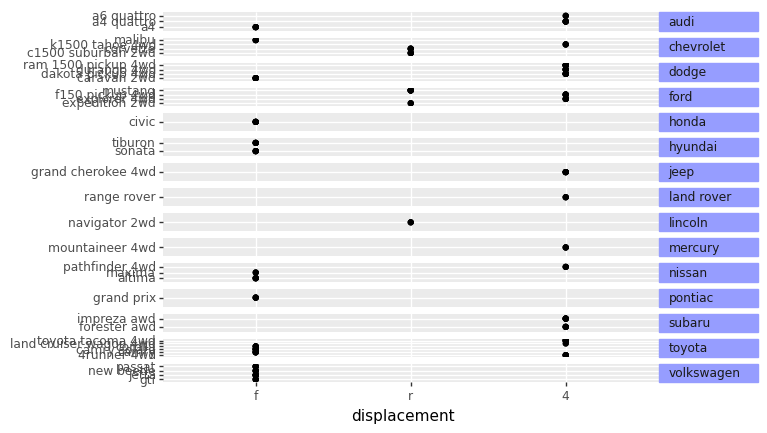

<ggplot: (7016406767)>

In [11]:
(
    ggplot(mpg, aes(x='drv', y='model'))
    + geom_point()
    + facet_grid('manufacturer ~ .', scales = 'free')
    + theme(strip_text_y = element_text(angle = 0,              # change facet text angle
                                        ha = 'left'             # change text alignment
                                       ),
            strip_background_y = element_text(color = '#969dff' # change background colour of facet background
                                              , width = 0.2     # adjust width of facet background to fit facet text
                                             )
           )
    + xlab('displacement')
    + ylab('')
)